In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# load dataset
df = pd.read_csv("energy_data.csv")
df.head()

,timestamp,location,energy_consumption,temperature
0,01-01-2023 00:00,Industrial,139.101364,33.820542
1,01-01-2023 01:00,Residential,247.109808,26.392602
2,01-01-2023 02:00,Industrial,233.934693,25.027439
3,01-01-2023 03:00,Industrial,243.013532,27.107712
4,01-01-2023 04:00,Residential,313.502582,27.326153


In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed')
df = df.dropna()
df = df.set_index("timestamp")
df.head()

,location,energy_consumption,temperature
timestamp,,,
2023-01-01 00:00:00,Industrial,139.101364,33.820542
2023-01-01 01:00:00,Residential,247.109808,26.392602
2023-01-01 02:00:00,Industrial,233.934693,25.027439
2023-01-01 03:00:00,Industrial,243.013532,27.107712
2023-01-01 04:00:00,Residential,313.502582,27.326153


In [6]:
X = df[["energy_consumption", "temperature"]]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

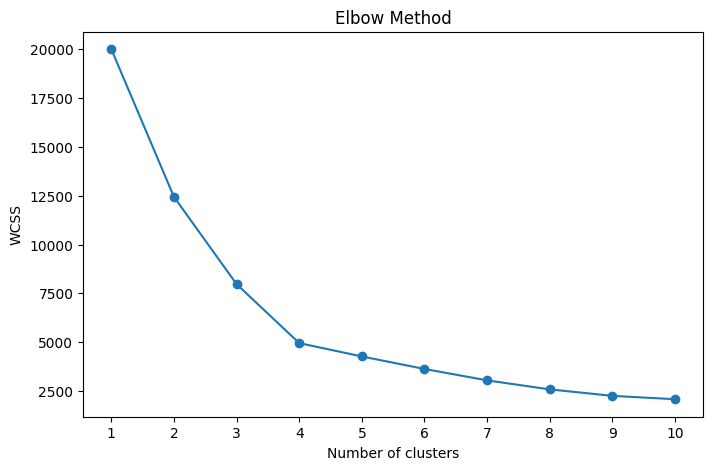

In [8]:
# elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
# plotting elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()


In [9]:
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [10]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3742803579579692


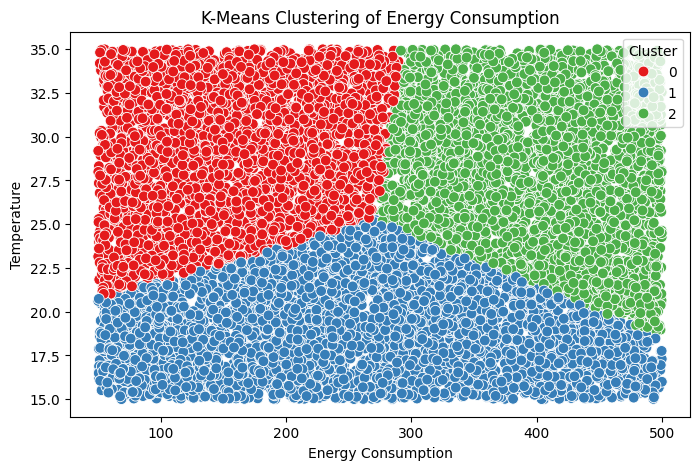

In [11]:
# visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x='energy_consumption', y='temperature', hue='cluster', data=df, palette='Set1', s=60)
plt.title('K-Means Clustering of Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Temperature')
plt.legend(title='Cluster')
plt.show()

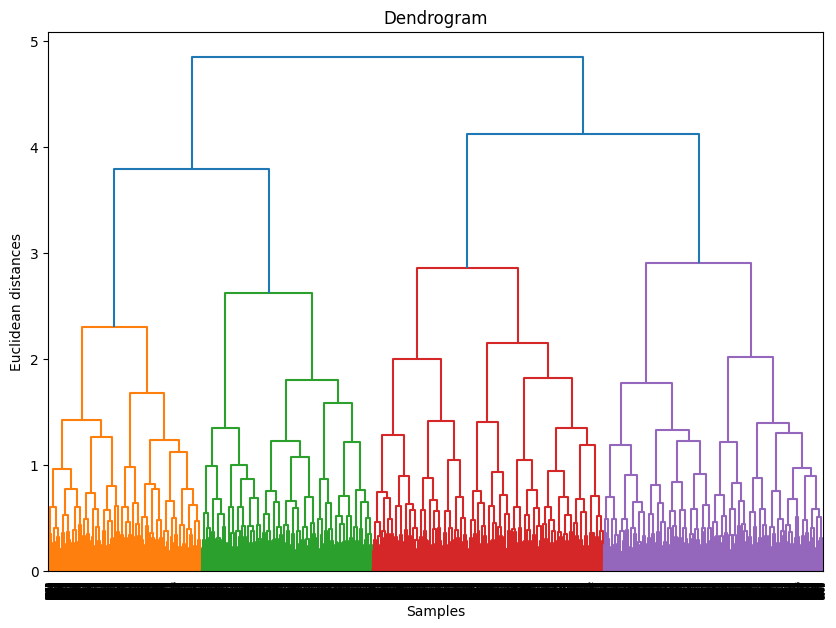

In [12]:
# heirarchical clustering
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='complete'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=best_k, linkage='complete')
df['agg_cluster'] = agg_clustering.fit_predict(X_scaled)
df['agg_cluster'].head()

timestamp
2023-01-01 00:00:00    2
2023-01-01 01:00:00    2
2023-01-01 02:00:00    2
2023-01-01 03:00:00    2
2023-01-01 04:00:00    0
Name: agg_cluster, dtype: int64

Text(0, 0.5, 'Temperature')

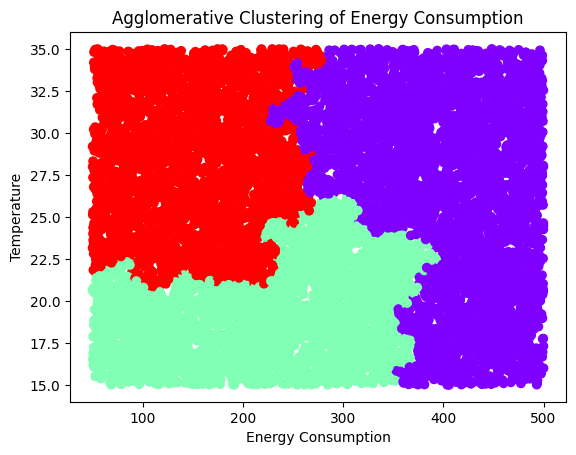

In [20]:
plt.scatter(df['energy_consumption'], df['temperature'], c=df['agg_cluster'], cmap='rainbow')
plt.title('Agglomerative Clustering of Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Temperature')

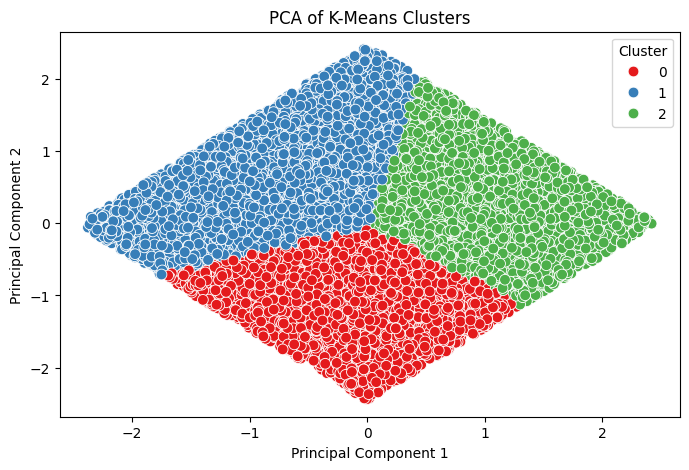

In [26]:
# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='Set1', s=60)
plt.title('PCA of K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [23]:
pca.explained_variance_

array([1.00435784, 0.99584218])